# Problem 4, Parts F-H: Stochastic Gradient Descent with a Larger Dataset Solution

Use this notebook to write your code for problem 4 parts F-H by filling in the sections marked `# TODO` and running all cells.

In [1]:
# Setup.

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Problem 4F: Perform SGD with the new dataset

For the functions below, you may re-use your code from parts 4C-E. Note that you can now modify your SGD function to return the final weight vector instead of the weights after every epoch.

Here is sample solution code:

In [3]:
def loss(X, Y, w):
    '''
    Calculate the squared loss function.
    
    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
        w: A (D, ) shaped numpy array containing the weight vector.
    
    Outputs:
        The loss evaluated with respect to X, Y, and w.
    '''
    return np.sum((Y - np.dot(X, w))**2)

def gradient(x, y, w):
    '''
    Calculate the gradient of the loss function with respect to
    a single point (x, y), and using weight vector w.
    
    Inputs:
        x: A (D, ) shaped numpy array containing a single data point.
        y: The float label for the data point.
        w: A (D, ) shaped numpy array containing the weight vector.
        
    Output:
        The gradient of the loss with respect to x, y, and w. 
    '''
    return -2 * x * (y - np.dot(w, x))

def SGD(X, Y, w_start, eta, N_epochs):
    '''
    Perform SGD using dataset (X, Y), initial weight vector w_start,
    learning rate eta, and N_epochs epochs.
    
    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
        w_start:  A (D, ) shaped numpy array containing the weight vector initialization.
        eta: The step size.
        N_epochs: The number of epochs (iterations) to run SGD.
        
    Outputs:
        w: A (D, ) shaped array containing the final weight vector.
        losses: A (N_epochs, ) shaped array containing the losses from all iterations.
    '''
    # Initialize variables.
    losses = np.zeros(N_epochs)
    w = w_start

    # Perform SGD for each epoch.
    for i in range(N_epochs):
        # Store result from previous iteration.
        losses[i] = loss(X, Y, w)
        
        shuffled = np.random.permutation(len(Y))
        for j in shuffled:
            w -= eta * gradient(X[j], Y[j], w)

    return w, losses

Next, we need to load the dataset. In doing so, the following function may be helpful:

In [4]:
def load_data(filename):
    """
    Function loads data stored in the file filename and returns it as a numpy ndarray.
    
    Inputs:
        filename: given as a string.
        
    Outputs:
        Data contained in the file, returned as a numpy ndarray
    """
    return np.loadtxt(filename, skiprows=1, delimiter=',')

Now, load the dataset in `sgd_data.csv` and run SGD using the given parameters; print out the final weights.

Here is sample solution code:

In [6]:
# Load the data.
data = load_data('data/sgd_data.csv')
X = data[:,:-1]
y = data[:,-1]

# Add x_0 = 1 to each row.
ones = np.ones((len(X), 1))
X = np.hstack((ones, X))

In [7]:
# Parameters for SGD:
w_start = np.array([0.001] * 5)
eta = np.exp(-15)
N_epochs = 800

# Run SGD:
w, losses = SGD(X, y, w_start, eta, N_epochs)

print('w = ', w)

w =  [ -0.22716868  -5.94208435   3.94393005 -11.72381335   8.78570447]


## Problem 4G: Convergence of SGD

This problem examines the convergence of SGD for different learning rates. Please implement your code in the cell below:

Sample solution code:

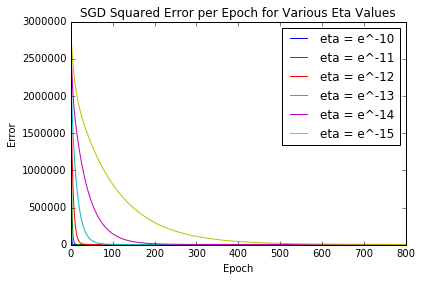

In [9]:
# Create a plot showing the convergence of SGD for the different learning rates.
N_epochs = 1000

legend_handles = []
series_names = []

plt.figure()

all_losses = []

for i in range(10, 16):
    _, losses = SGD(X, y, np.array([0.001] * 5), np.exp(-i), N_epochs)
    all_losses.append(losses)
    name = 'eta = e^' + str(-i)
    data_series, = plt.plot(losses, label=name)
    legend_handles.append(data_series)
    series_names.append(name)

plt.legend(legend_handles, series_names)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('SGD Squared Error per Epoch for Various Eta Values')
plt.show()

## Problem 4H

Provide your code for computing the least-squares analytical solution below.

The analytical solution can be found using the following code:

In [11]:
# Least-squares analytical solution:
print('w =', np.dot(np.linalg.inv(np.dot(np.transpose(X), X)), np.dot(np.transpose(X), y)))

w =  [ -0.31644251  -5.99157048   4.01509955 -11.93325972   8.99061096]
